<a href="https://colab.research.google.com/github/dewipuspita0904/SubmissionMLT1/blob/main/Submission_Machine_Learning_Terapan_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Nilai Ujian Berdasarkan Kebiasaan dan Gaya Hidup Mahasiswa

## Latar Belakang
Pendidikan tinggi memiliki peran penting dalam membentuk masa depan individu dan masyarakat. Namun, pencapaian akademik mahasiswa tidak hanya ditentukan oleh kurikulum formal, melainkan juga oleh faktor-faktor eksternal seperti kebiasaan belajar, durasi penggunaan media sosial, kualitas tidur, kondisi kesehatan mental, dan partisipasi ekstrakurikuler. Pemahaman yang baik terhadap pengaruh variabel-variabel ini dapat membantu institusi pendidikan merancang intervensi yang tepat untuk mendukung performa mahasiswa.

Proyek ini bertujuan untuk membangun model regresi guna memprediksi exam score mahasiswa berdasarkan fitur-fitur kebiasaan harian dan gaya hidup dalam dataset “Student Habits vs Academic Performance” (Kaggle).

# 1. Import Library

In [1]:
!pip install -q kaggle

In [2]:
# Import Data Loading
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings('ignore')

# Import Data Preparation
from sklearn.preprocessing import  OneHotEncoder, StandardScaler # OneHotEncoder: Encoding Fitur Kategori; StandardScaler: Standarisasi
from sklearn.model_selection import train_test_split # Split Data

# Import Model Development
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor # Random Forest & Boosting

# Import Model Evaluation
from sklearn.metrics import mean_squared_error # MSE

# 2. Data Understanding

## 2.1. Data Loading

Supaya isi dataset lebih mudah dipahami, kita perlu melakukan proses loading data terlebih dahulu. Tidak lupa, import library pandas untuk dapat membaca file datanya.

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dewipuspita0904","key":"79b8f8e42e00e633808b12391f3fa555"}'}

In [4]:
!mkdir ~/.kaggle # membuat folder .kaggle
!cp kaggle.json ~/.kaggle/ # menyalin file credential ke lokasi yang sesuai
!chmod 600 ~/.kaggle/kaggle.json # mengatur izin file agar bisa digunakan oleh kernel Colab
!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance # mengunduh dataset dari Kaggle

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
  0% 0.00/19.1k [00:00<?, ?B/s]
100% 19.1k/19.1k [00:00<00:00, 61.2MB/s]


In [5]:
# mengekstrak file ZIP dataset
zip_ref = zipfile.ZipFile('/content/student-habits-vs-academic-performance.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
# load the dataset
ml = pd.read_csv('/content/student_habits_performance.csv')
ml

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


Output di atas memberikan informasi sebagai berikut:
- Ada 1.000 baris.
- Terdapat 16 kolom, yaitu: `student_id`, `age`, `gender`, `study_hours_per_day`, `social_media_hours`, `netflix_hours`, `part_time_job`, `attendance_percentage`, `sleep_hours`, `diet_quality`, `exercise_frequency`, `parental_education_level`, `internet_quality`, `mental_health_rating`, `extracurricular_participation`, dan `exam_score`.

## 2.2. EDA - Deskripsi Variabel

Berdasarkan informasi dari Kaggle, variabel-variabel pada Mental Health dataset adalah sebagai berikut:

|Fitur |Tujuan|
|-----------|------------------------|
|student_id |ID unik siswa (tidak penting untuk analisis; dapat dianonimkan) |
|age |Usia dalam tahun |
|gender |Jenis kelamin |
|study_hours_per_day |Rata-rata lama belajar per hari |
|social_media_hours |Rata-rata lama bermain sosial media per hari|
|netflix_hours |Rata-rata lama menonton netflix per hari |
|part_time_job |Apakah memiliki pekerjaan sebagai part time atau tidak |
|attendance_percentage |Persentase kehadiran kelas (0-100%) |
|sleep_hours |Rata-rata lama tidur harian |
|diet_quality |Kualitas makanan sehari-hari (Poor/Fair/Good) |
|exercise_frequency |Berapa kali berolahraga dalam seminggu|
|parental_education_level|Tingkat edukasi orang tua|
|internet_quality|Kualitas internet|
|mental_health_rating |Nilai kesehatan mental dari skala 1-10|
|extracurricular_participation|Apakah mengikuti ekstrakulikuler atau tidak|
|exam_score (target)|Nilai ujian|

Setelah memahami deskripsi variabel pada data, langkah selanjutnya adalah mengecek informasi pada dataset dengan fungsi `info()` berikut.

In [7]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Dari output terlihat bahwa:
- Terdapat 6 kolom numerik dengan tipe data float64, yaitu: `study_hours_per_day`, `social_media_hours`, `netflix_hours`, `attendance_percentage`, `sleep_hours`, dan `exam_score`.
- Terdapat 3 kolom numerik dengan tipe data int64, yaitu: `age`, `exercise_frequency`, dan `mental_health_rating`.
- Terdapat 7 kolom dengan tipe object, yaitu: `student_id`, `gender`, `part_time_job`, `diet_quality`, `parental_education_level`, dan `internet_quality`, dan `extracurricular_participation`.

Uraian di atas menunjukkan bahwa setiap kolom telah memiliki tipe data yang sesuai. Selanjutnya, kita akan mengecek deskripsi statistik data dengan fitur `describe()`.

In [8]:
ml.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:
- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- `75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

## 2.3. EDA - Menangani Missing Value dan Outliers

In [9]:
# Karena kita tidak akan menggunakan kolom student_id, maka kolom student_id dapat kita hapus.
ml.drop(['student_id'], inplace=True, axis=1)

In [10]:
ml.isnull().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


Dari data di atas, terdapat 91 missing value pada data sehingga perlu kita buang.

In [11]:
ml_clean = ml.dropna()

In [12]:
ml_clean.isnull().sum()

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0
exercise_frequency,0


In [13]:
ml_clean.shape

(909, 15)

Setelah missing value dan kolom tidak terpakai dihapus, sekarang data tersisa adalah 909 baris dengan 15 kolom.

<Axes: xlabel='age'>

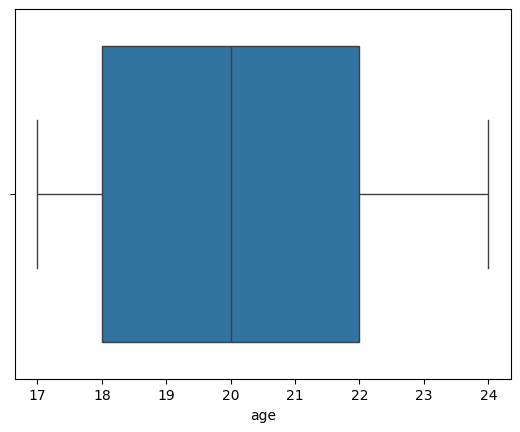

In [14]:
# Visualisasi data Mental Healths ddengan boxplot untuk mendeteksi outliers pada beberapa fitur numerik.
sns.boxplot(x=ml_clean['age']) # Age

<Axes: xlabel='exercise_frequency'>

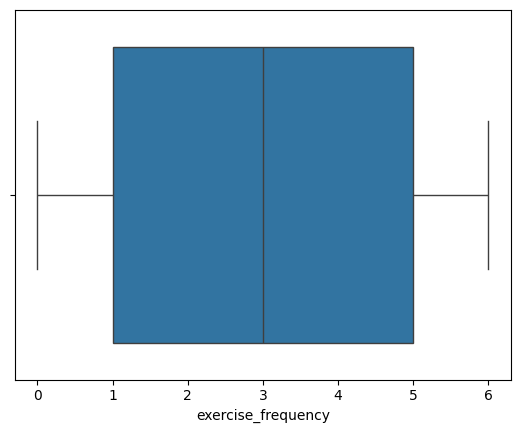

In [ ]:
sns.boxplot(x=ml_clean['exercise_frequency']) # Exercise Frequency

<Axes: xlabel='mental_health_rating'>

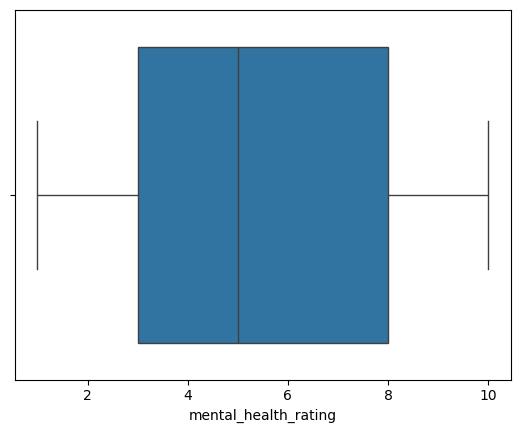

In [ ]:
sns.boxplot(x=ml_clean['mental_health_rating']) # Mental Heatlh Rating

<Axes: xlabel='study_hours_per_day'>

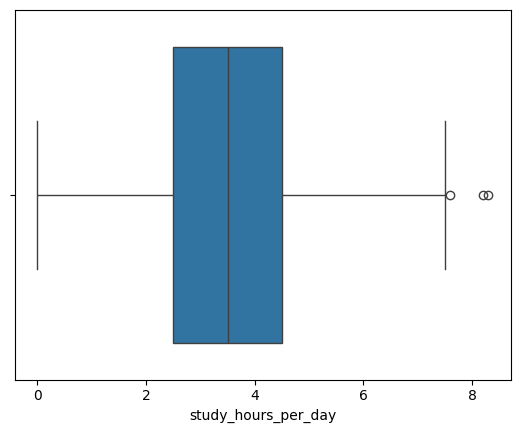

In [ ]:
sns.boxplot(x=ml_clean['study_hours_per_day']) # Study Hours per Day

<Axes: xlabel='social_media_hours'>

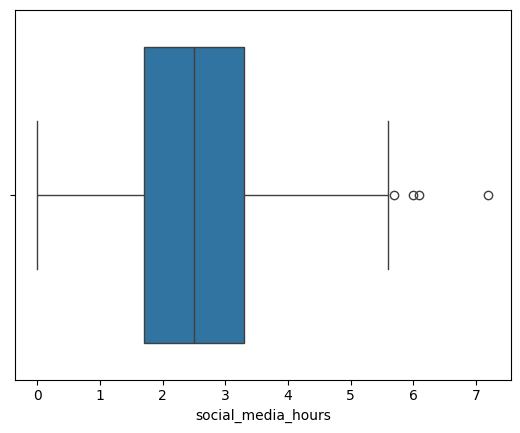

In [ ]:
sns.boxplot(x=ml_clean['social_media_hours']) # Social Media Hours

<Axes: xlabel='netflix_hours'>

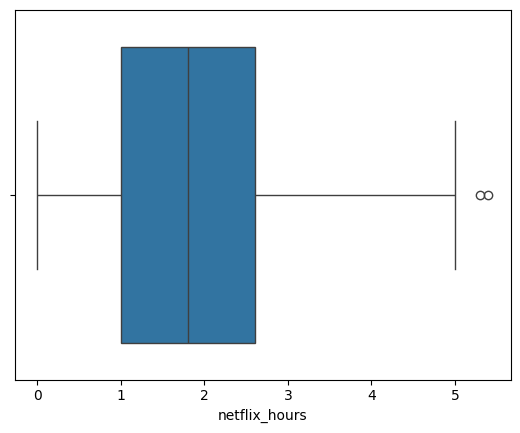

In [ ]:
sns.boxplot(x=ml_clean['netflix_hours']) # Netflix Hours

<Axes: xlabel='attendance_percentage'>

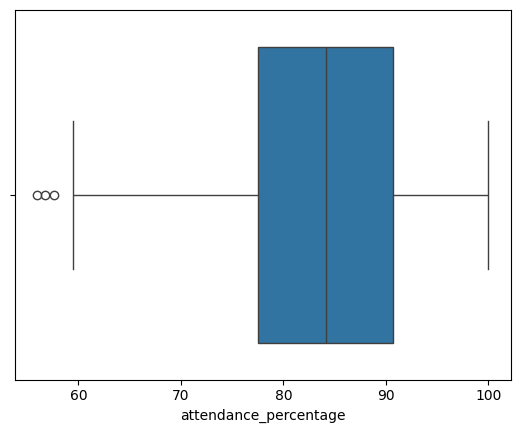

In [ ]:
sns.boxplot(x=ml_clean['attendance_percentage']) # Attendance Percentage

<Axes: xlabel='sleep_hours'>

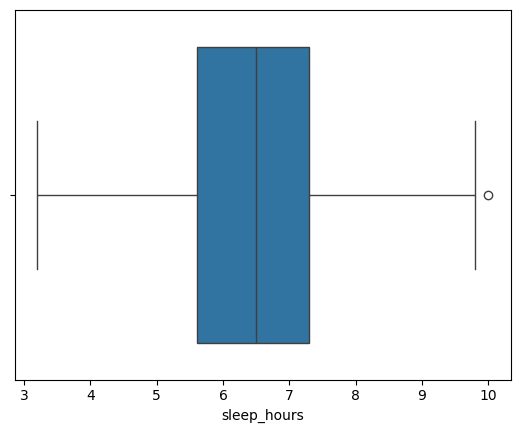

In [ ]:
sns.boxplot(x=ml_clean['sleep_hours']) # Sleep Hours

In [15]:
# Ambil hanya kolom numerikal
numeric_cols = ml_clean.select_dtypes(include='number').columns

# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = ml_clean[numeric_cols].quantile(0.25)
Q3 = ml_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((ml_clean[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (ml_clean[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
ml_clean = ml_clean[filter_outliers]

# Cek ukuran dataset setelah outlier dihapus
ml_clean.shape

(894, 15)

Setelah data duplikat dan data yang berada pada outlier dihapus, maka dataset tersisa 894 sampel.

## 2.4. EDA - Univariate Analysis

In [16]:
# Membagi fitur pada dataset menjadi 2 bagian, yaitu numerical features dan categorical features.
numerical_features = ['age', 'exercise_frequency', 'mental_health_rating', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exam_score']
categorical_features = ['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

### Categorical Features
#### Fitur Gender

        jumlah sampel  persentase
gender                           
Male              433        48.4
Female            425        47.5
Other              36         4.0


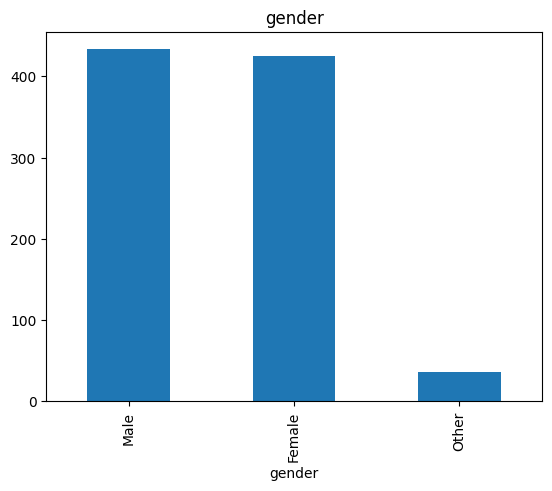

In [17]:
feature = categorical_features[0]
count = ml_clean[feature].value_counts()
percent = 100*ml_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Distribusi gender dalam dataset relatif seimbang antara laki-laki (48.4%) dan perempuan (47.5%), dengan sejumlah kecil responden mengidentifikasi sebagai Other (4.0%). Komposisi ini menunjukkan representasi gender yang cukup merata, meskipun kategori "Other" masih minoritas.

#### Fitur Part Time Job

               jumlah sampel  persentase
part_time_job                           
No                       703        78.6
Yes                      191        21.4


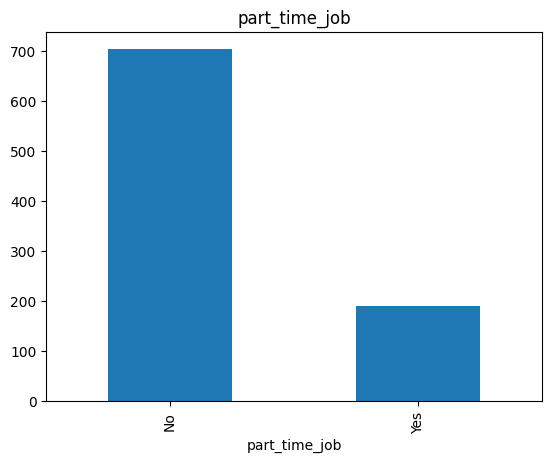

In [18]:
feature = categorical_features[1]
count = ml_clean[feature].value_counts()
percent = 100*ml_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Mayoritas responden tidak memiliki pekerjaan paruh waktu (78.6%), sementara hanya 21.4% yang bekerja paruh waktu. Ini mengindikasikan bahwa sebagian besar individu dalam populasi ini berfokus pada kegiatan lain seperti studi penuh waktu.

#### Fitur Diet Quality

              jumlah sampel  persentase
diet_quality                           
Fair                    392        43.8
Good                    343        38.4
Poor                    159        17.8


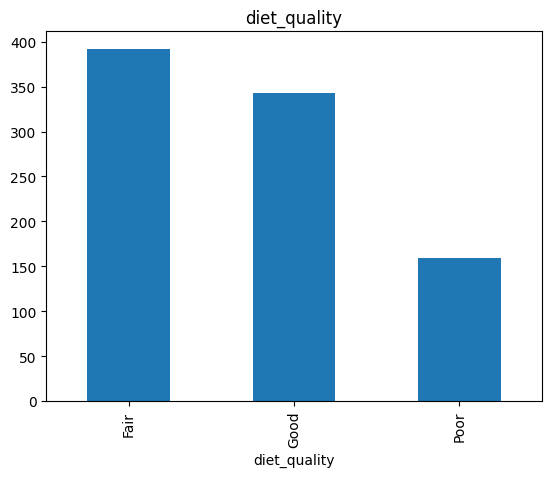

In [19]:
feature = categorical_features[2]
count = ml_clean[feature].value_counts()
percent = 100*ml_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Responden paling banyak menilai kualitas makanan mereka sebagai Fair (43.8%), disusul oleh Good (38.4%), dan Poor (17.8%). Ini menunjukkan bahwa mayoritas responden memiliki pola makan yang cukup baik, dengan sebagian kecil mengalami pola makan yang buruk.

#### Fitur Parental Education Level

                          jumlah sampel  persentase
parental_education_level                           
High School                         385        43.1
Bachelor                            345        38.6
Master                              164        18.3


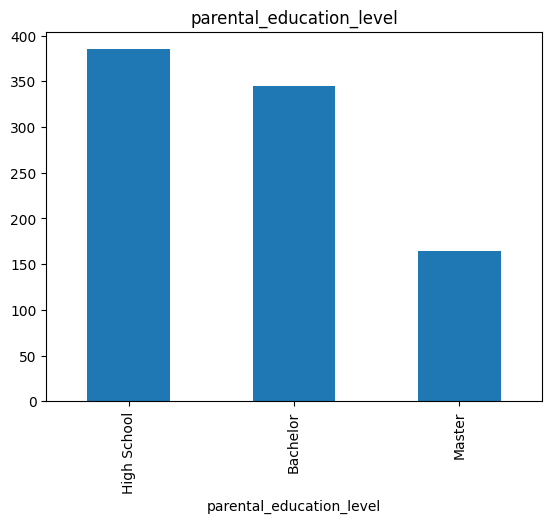

In [20]:
feature = categorical_features[3]
count = ml_clean[feature].value_counts()
percent = 100*ml_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Tingkat pendidikan orang tua paling banyak berada di kategori High School (43.1%), diikuti oleh Bachelor (38.6%) dan Master (18.3%). Komposisi ini menunjukkan latar belakang pendidikan orang tua yang umumnya menengah ke atas, namun masih didominasi oleh pendidikan sekolah menengah.

#### Fitur Internet Quality

                  jumlah sampel  persentase
internet_quality                           
Good                        404        45.2
Average                     346        38.7
Poor                        144        16.1


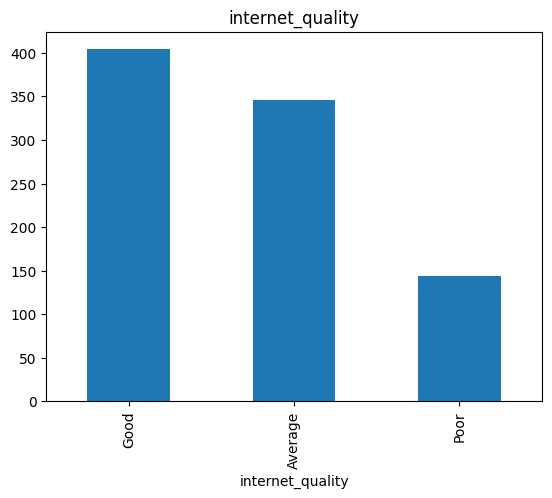

In [21]:
feature = categorical_features[4]
count = ml_clean[feature].value_counts()
percent = 100*ml_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Mayoritas responden menilai kualitas internet mereka sebagai Good (45.2%) dan Average (38.7%), dengan hanya 16.1% yang mengalami kualitas internet Poor. Hal ini menunjukkan bahwa sebagian besar responden memiliki akses internet yang cukup baik, yang dapat berpengaruh terhadap aktivitas belajar atau hiburan mereka.

#### Fitur  Extracurricular Participation

                               jumlah sampel  persentase
extracurricular_participation                           
No                                       608        68.0
Yes                                      286        32.0


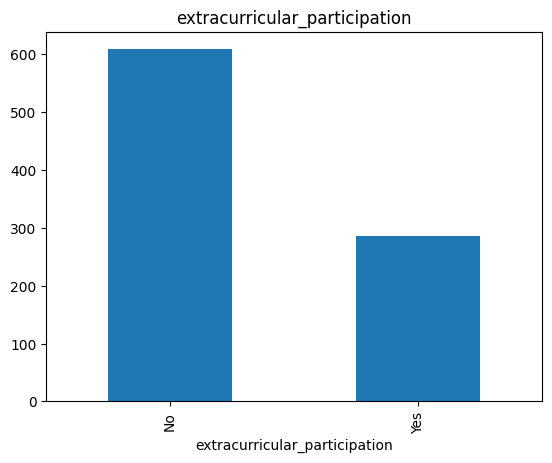

In [22]:
feature = categorical_features[5]
count = ml_clean[feature].value_counts()
percent = 100*ml_clean[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Sebanyak 68.0% responden tidak mengikuti kegiatan ekstrakurikuler, sementara hanya 32.0% yang berpartisipasi. Ini menandakan bahwa partisipasi dalam kegiatan ekstrakurikuler masih belum umum di kalangan responden, yang mungkin dapat memengaruhi aspek pengembangan diri di luar akademik.

### Numerical Features

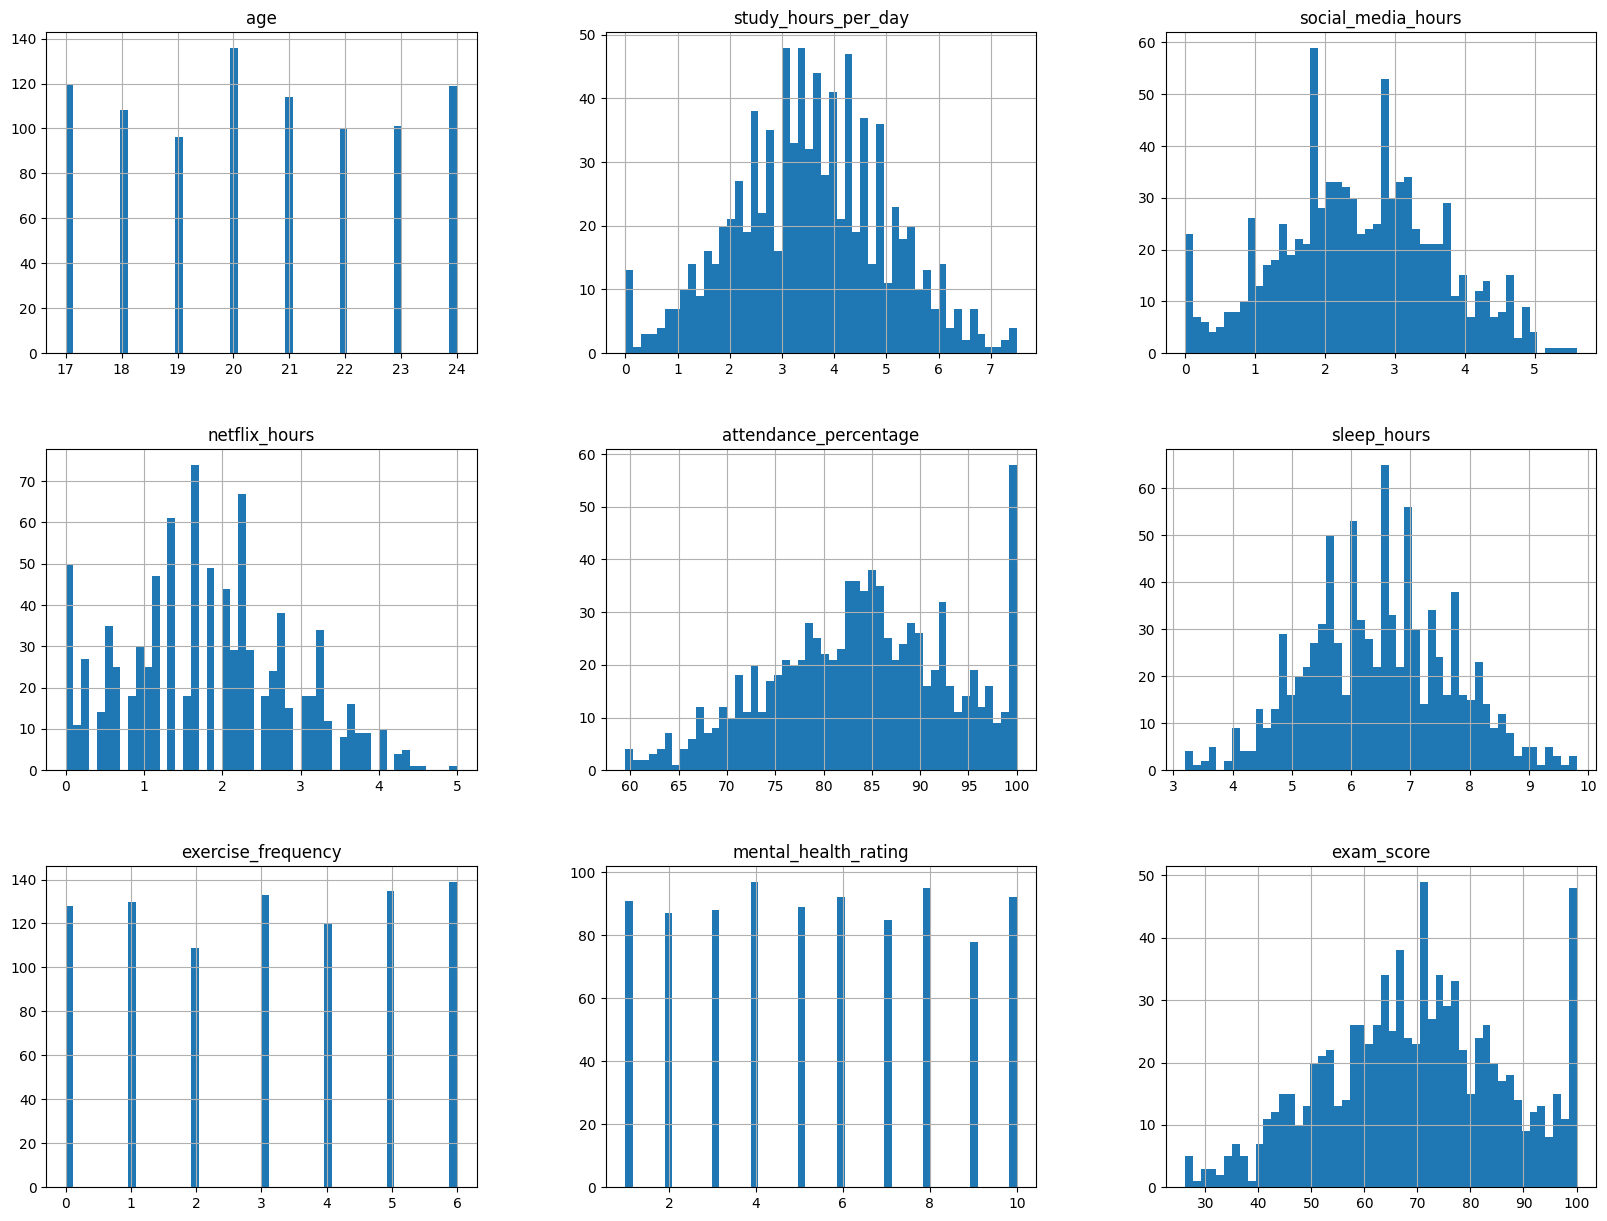

In [23]:
ml_clean.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan informasi di atas, terdapat beberapa insight yang bisa kita ambil:
- `age`: Distribusi usia cukup merata antara 17 hingga 24 tahun, dengan sedikit lonjakan pada usia 20 dan 24 tahun. Ini menunjukkan bahwa responden berasal dari rentang usia mahasiswa atau remaja akhir.
- `study_hours_per_day`: Sebagian besar responden belajar antara 2 hingga 5 jam per hari, dengan puncak sekitar 3–4 jam. Distribusi agak right-skewed, artinya sedikit responden yang belajar lebih dari 6 jam per hari.
- `social_media_hours`: Distribusi waktu penggunaan media sosial cukup variatif, dengan puncak di sekitar 2–3 jam. Terlihat pola yang agak tidak teratur, tapi mayoritas masih menggunakan media sosial dalam rentang 1–4 jam per hari.
- `netflix_hours`: Sebagian besar responden menonton Netflix selama 1–2 jam per hari, dengan jumlah kecil yang menonton lebih dari 3 jam. Distribusi ini juga right-skewed, menunjukkan bahwa binge-watching bukan kebiasaan mayoritas.
- `attendance_percentage`: Sebagian besar responden memiliki persentase kehadiran tinggi, dengan konsentrasi kuat antara 85% hingga 100%. Hal ini menunjukkan tingkat kedisiplinan yang baik secara umum.
- `sleep_hours`: Distribusi jam tidur membentuk pola normal (bell-shaped) dengan puncak di 6 hingga 7 jam per hari. Artinya, sebagian besar responden tidur dalam durasi yang disarankan untuk dewasa muda.
- `exercise_frequency`: Distribusinya cukup merata antara 0 hingga 6 kali per minggu, menunjukkan kebiasaan olahraga yang beragam, dari yang tidak pernah hingga yang cukup rutin.
- `mental_health_rating`: Sebagian besar nilai mental health rating terdistribusi merata dari 1 sampai 10, yang bisa mengindikasikan persepsi kesehatan mental yang bervariasi, tanpa dominasi jelas.
- `exam_score`: Distribusi nilai ujian menyerupai bentuk normal, dengan puncak antara 60–70. Ini menunjukkan performa umum berada di tingkat sedang hingga baik.

## 2.5. EDA - Multivariate Analysis

### Categorical Features
Pada tahap ini, kita akan mengecek `exam_score` terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap `exam_score`.

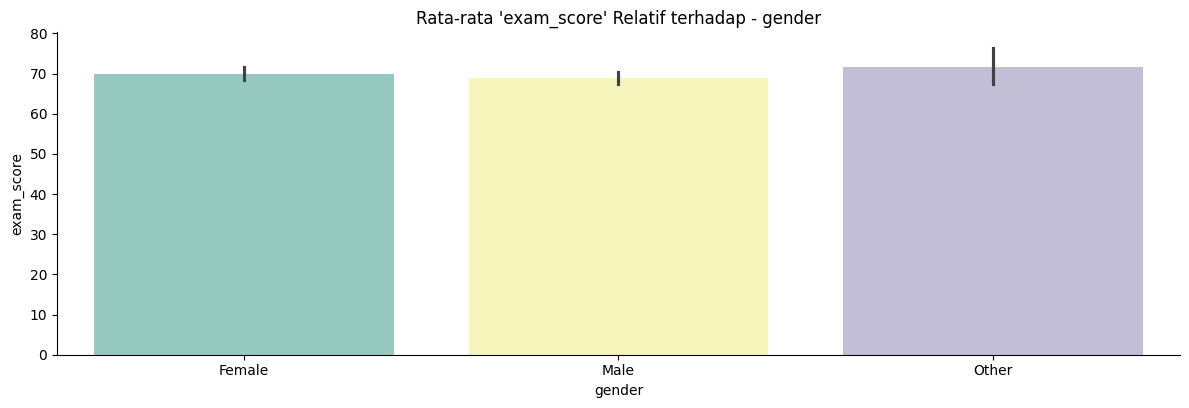

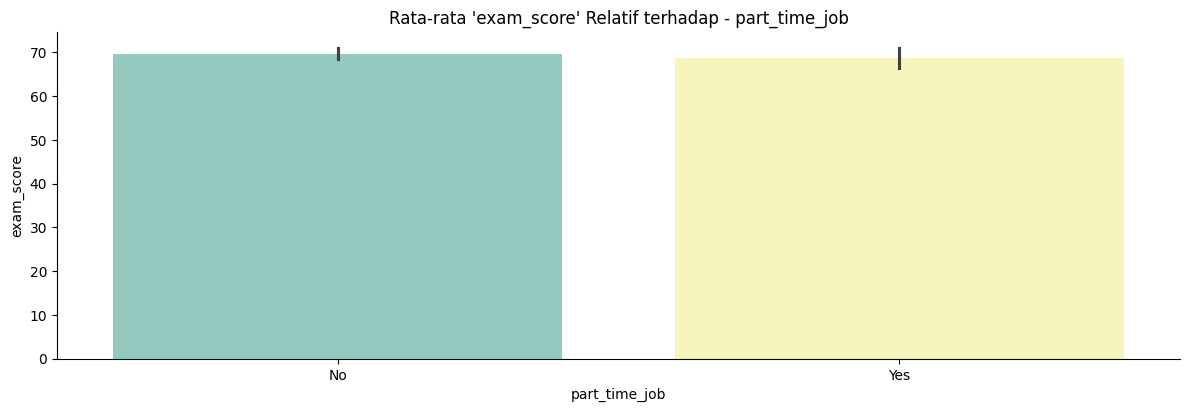

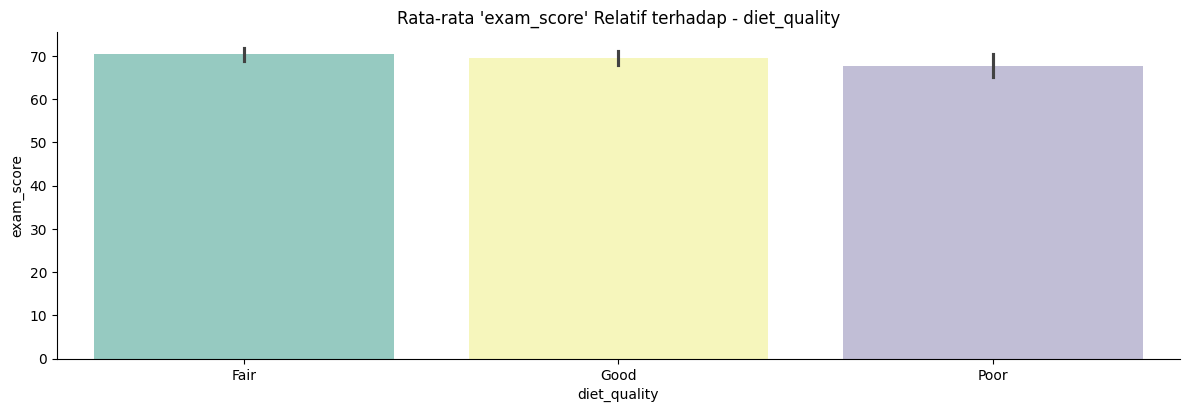

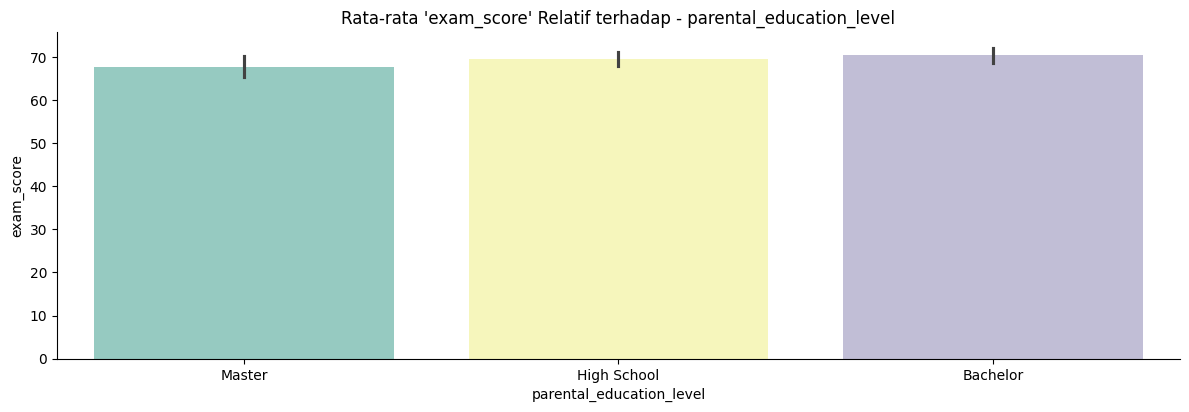

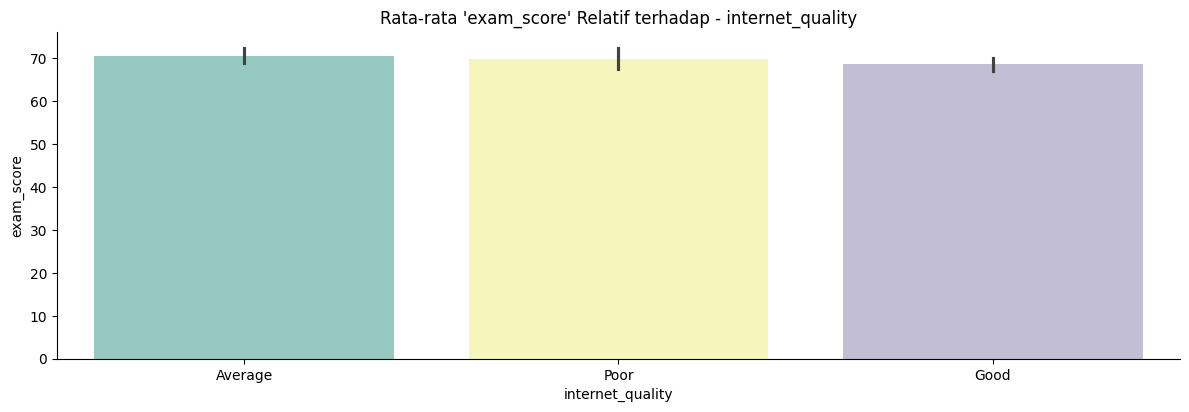

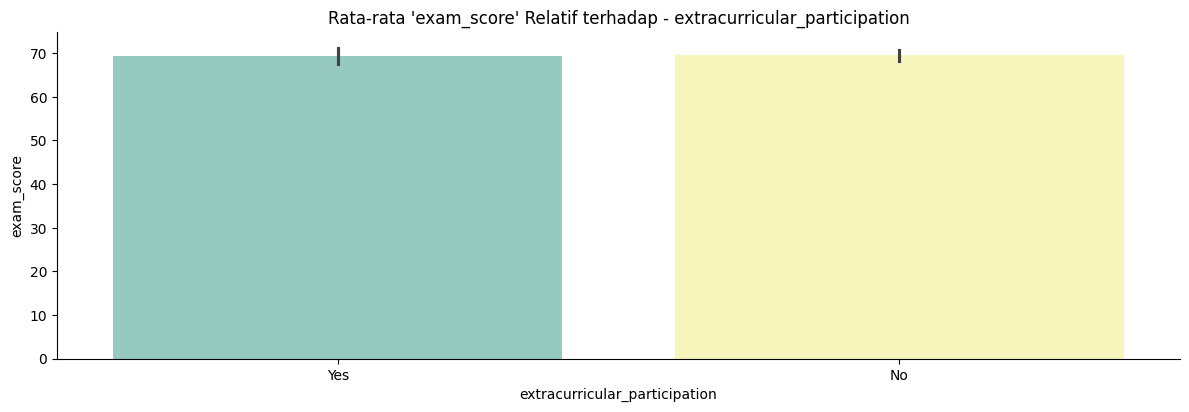

In [24]:
cat_features = ml_clean.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="exam_score", kind="bar", dodge=False, height = 4, aspect = 3,  data=ml_clean, palette="Set3")
  plt.title("Rata-rata 'exam_score' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata nilai ujian relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

1. `gender`
- Perempuan cenderung memiliki performa ujian yang lebih baik dibandingkan laki-laki. Bisa jadi karena perbedaan gaya belajar atau manajemen waktu.

2. `part_time_job`
- Bekerja sambil sekolah bisa mengganggu waktu belajar dan fokus sehingga berdampak negatif terhadap performa akademik.

3. `diet_quality`
- Pola makan tidak selalu berkorelasi langsung dengan performa akademik; bisa jadi siswa dengan diet `Fair` justru memiliki gaya hidup seimbang lainnya.

4. `parental_education_level`
- Hasil yang didapat tidak linear, bisa jadi memiliki faktor lain seperti dukungan emosional atau ekspektasi orang tua mungkin lebih berperan daripada tingkat pendidikan formal mereka.

5. `internet_quality`
- Koneksi internet yang terlalu baik mungkin mengarah pada distraksi online, sementara koneksi terlalu buruk menghambat akses belajar. Kualitas cukup bisa jadi ideal untuk menjaga fokus.

6. `extracurricular_participation`
- Fokus penuh pada akademik bisa meningkatkan nilai ujian, tetapi perlu ditimbang dengan keterampiral non-akademik yang dikembangkan lewat ekstrakurikuler.

### Numerical Features

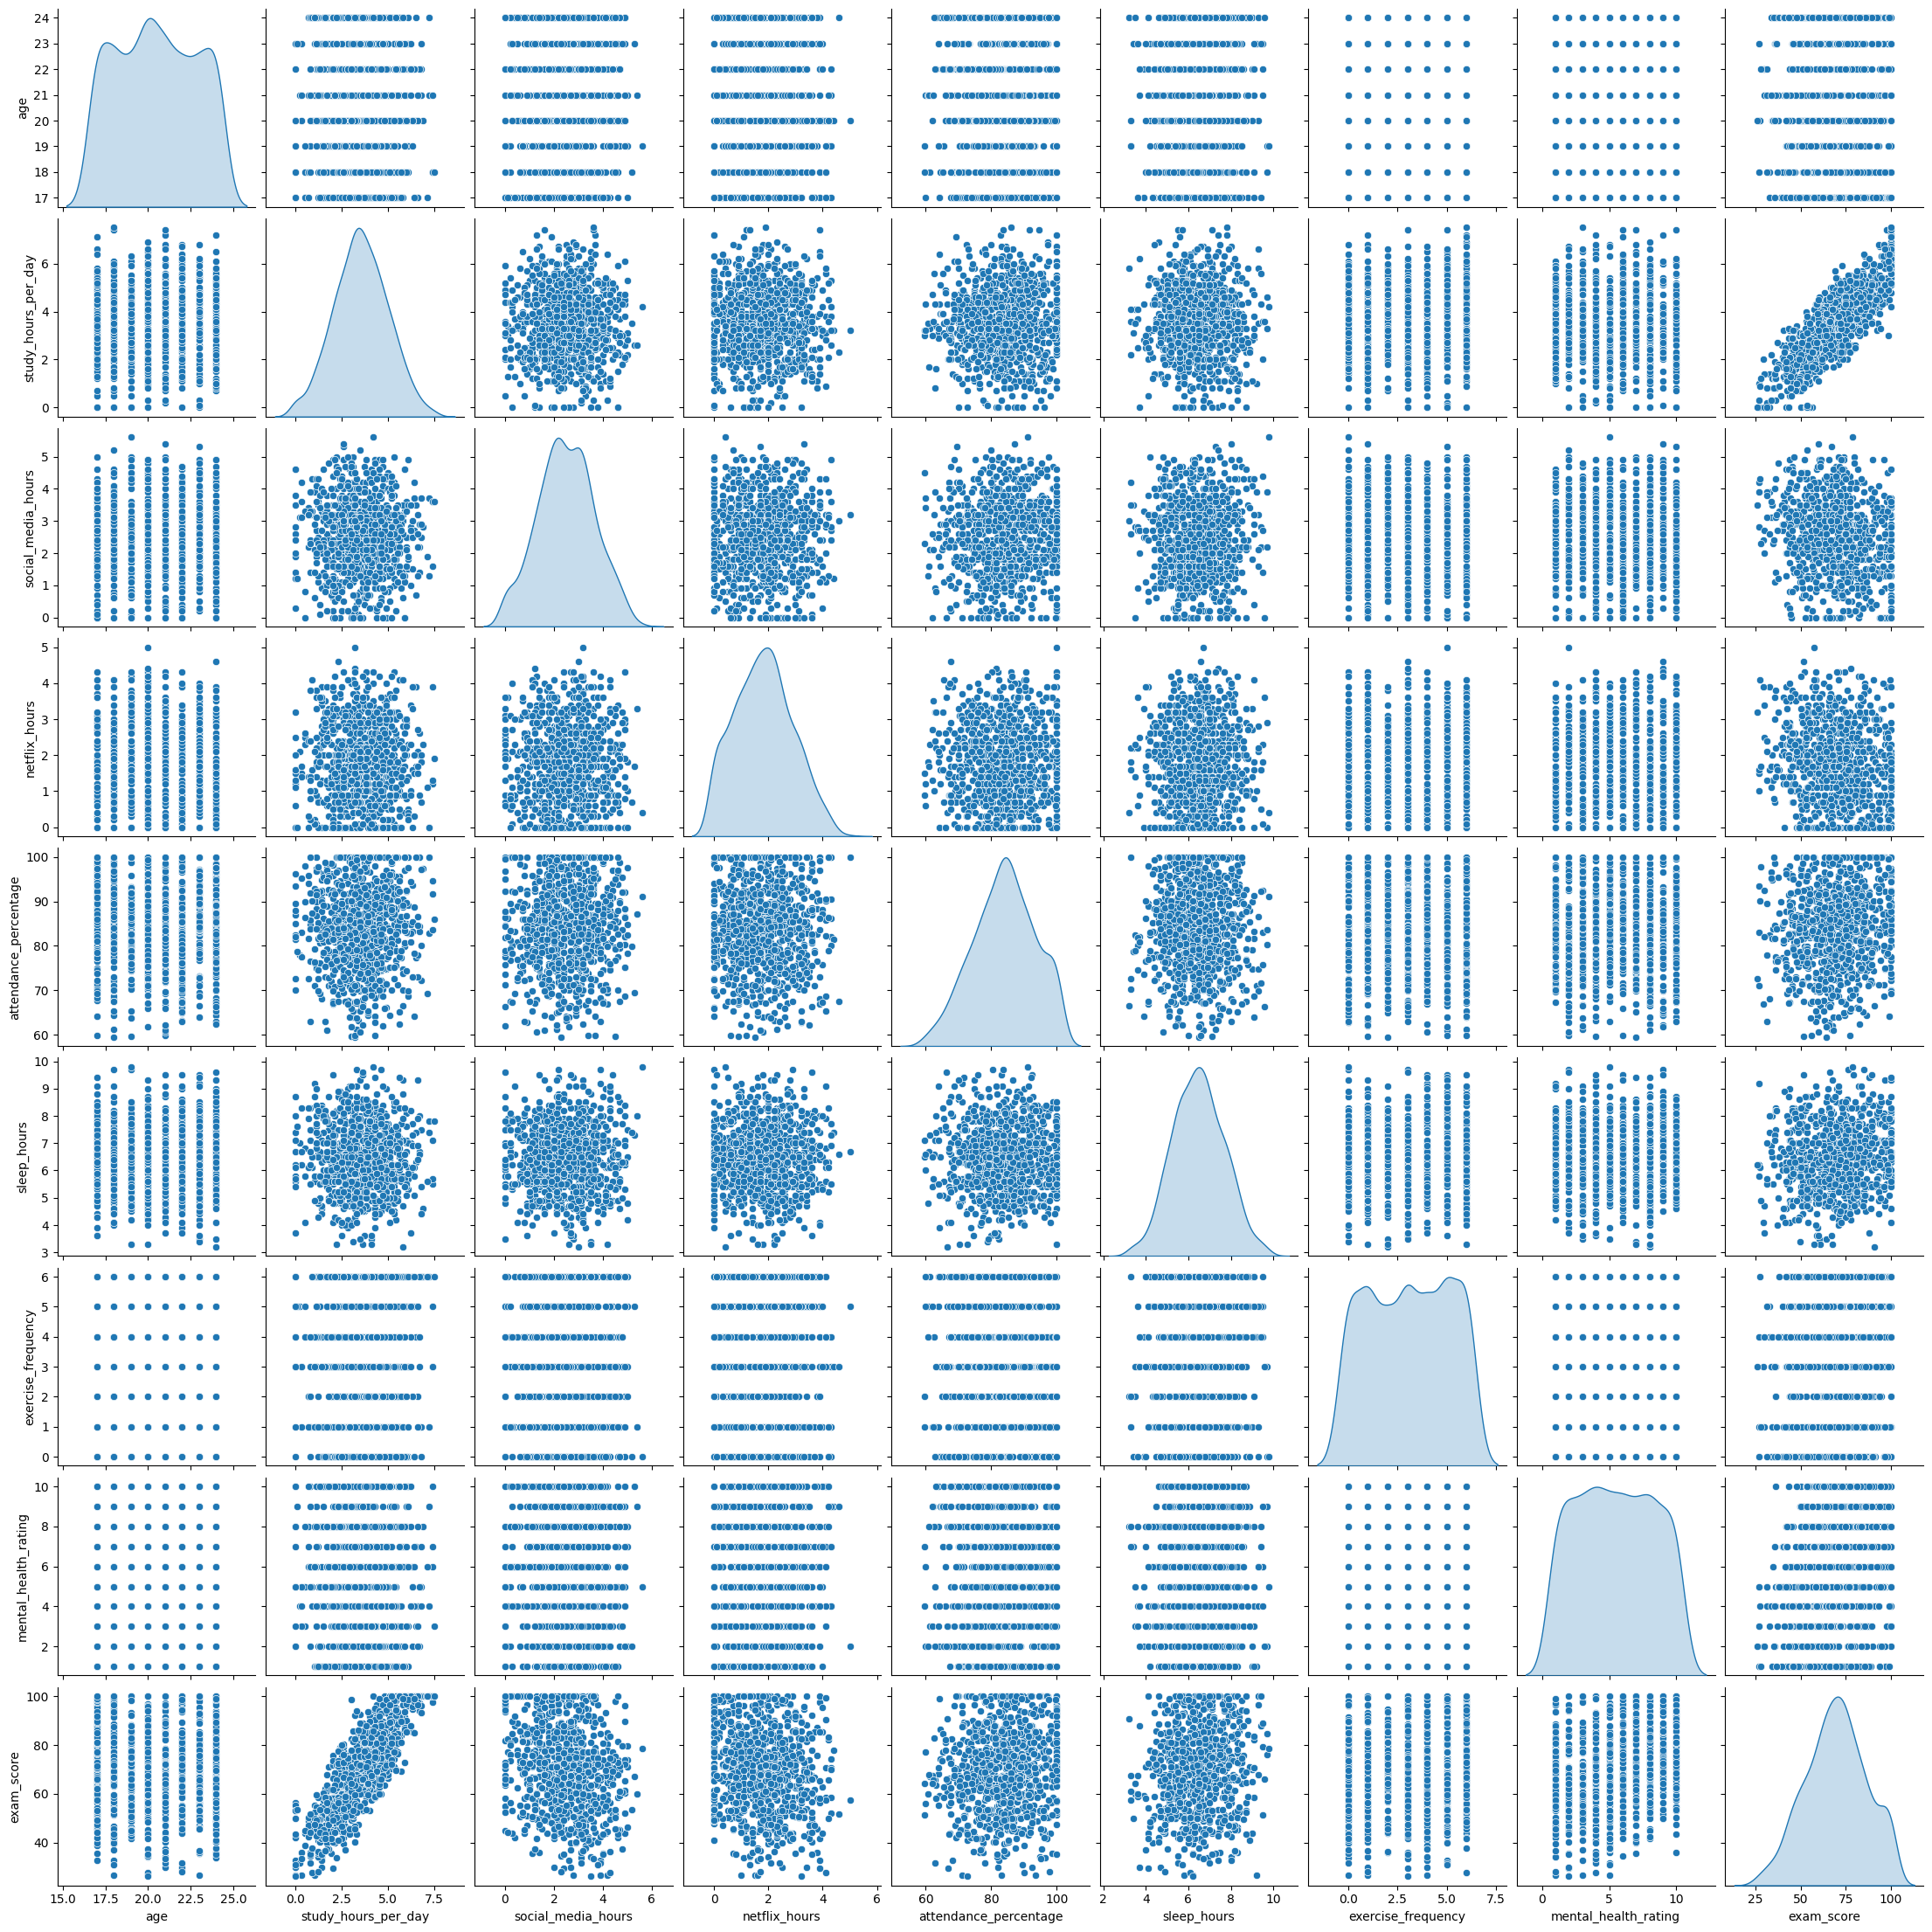

In [25]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(ml_clean, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

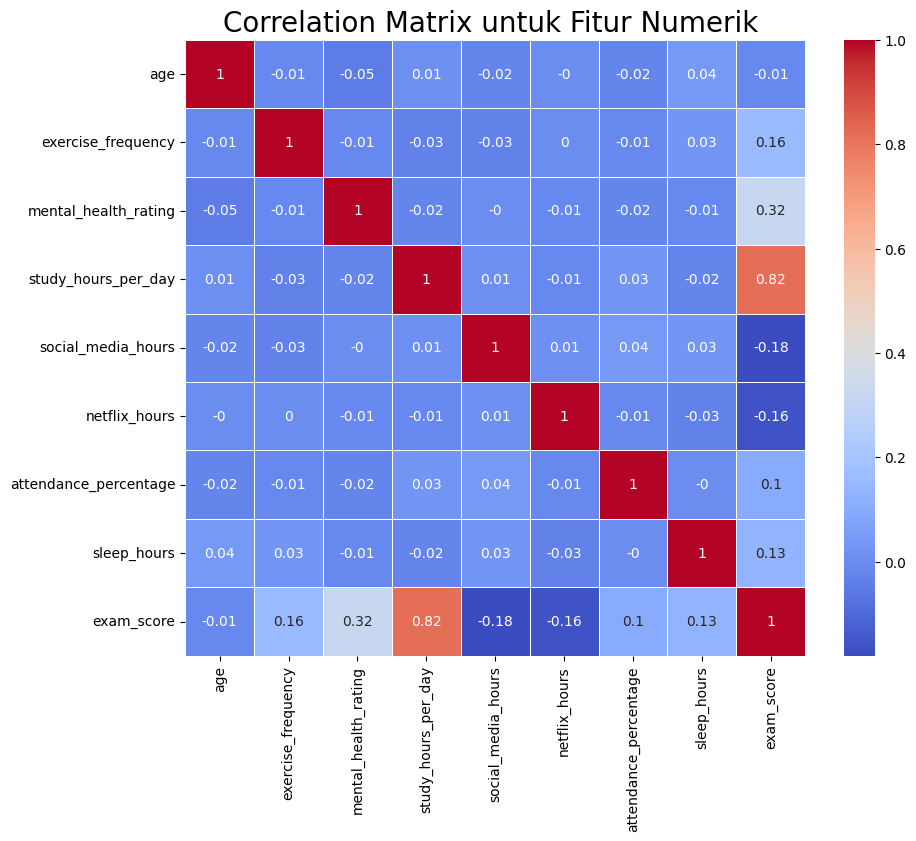

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = ml_clean[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan pairplot dan correlation matrix yang ditampilkan, kita bisa menyimpulkan beberapa insight, antara lain:

|Fitur                |Korelasi dengan `exam_score`     |Kekuatan Korelasi        |Tipe         |Insight Penting         |
|---------------------|-----------|----------|-----------|---------------|
|`study_hours_per_day` |0,82       |Sangat kuat |Positif |Ini adalah faktor terkuat yang menentukan nilai ujian. Semakin banyak belajar, semakin tinggi skornya. |
|`mental_health_rating` |0,32 |Sedang/Lemah |Positif |Kesehatan mental yang baik cenderung mendukung performa belajar. |
|`exercise_frequency` |0,16 |Lemah |Positif |Olahraga mungkin membantu fokus/energi tapi tidak signifikan. |
|`sleep_hours` |0,13 |Lemah |Positif |Tidak cukup sedikit membantu hasil ujian. |
|`attendance_percentage` |0,10 |Lemah |Positif |Hadir di kelas penting, tapi tidak sekuat waktu belajar. |
|`netflix_hours` |-0,16 |Lemah |Negatif |Waktu untuk hiburan berlebihan bisa menggangu performa belajar |
|`social_media_hours` |-0,18 |Lemah |Negatif |Semakin banyak waktu di media sosial, cenderung menurunkan skor. |
|`age` |-0,01 |Sangat lemah/tidak ada |Netral |Usia tidak memiliki pengaruh signifikan dalam dataset ini. |


In [27]:
ml_clean.drop(['age'], inplace=True, axis=1)
ml_clean.head()

,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Karena `age` memiliki pengaruh yang sangat lemah bahkan hampir tidak berpengaruh, maka kita bisa menghiraukan kolom tersebut.

# 3. Data Preparation

## 3.1. Encoding Fitur Kategori

In [28]:
ml_clean = pd.concat([ml_clean, pd.get_dummies(ml_clean['gender'], prefix='gender')],axis=1)
ml_clean = pd.concat([ml_clean, pd.get_dummies(ml_clean['part_time_job'], prefix='part_time_job')],axis=1)
ml_clean = pd.concat([ml_clean, pd.get_dummies(ml_clean['diet_quality'], prefix='diet_quality')],axis=1)
ml_clean = pd.concat([ml_clean, pd.get_dummies(ml_clean['parental_education_level'], prefix='parental_education_level')],axis=1)
ml_clean = pd.concat([ml_clean, pd.get_dummies(ml_clean['internet_quality'], prefix='internet_quality')],axis=1)
ml_clean = pd.concat([ml_clean, pd.get_dummies(ml_clean['extracurricular_participation'], prefix='extracurricular_participation')],axis=1)
ml_clean.drop(['gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation'], axis=1, inplace=True)
ml_clean.head()

,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score,gender_Female,gender_Male,...,diet_quality_Good,diet_quality_Poor,parental_education_level_Bachelor,parental_education_level_High School,parental_education_level_Master,internet_quality_Average,internet_quality_Good,internet_quality_Poor,extracurricular_participation_No,extracurricular_participation_Yes
0,0.0,1.2,1.1,85.0,8.0,6,8,56.2,True,False,...,False,False,False,False,True,True,False,False,False,True
1,6.9,2.8,2.3,97.3,4.6,6,8,100.0,True,False,...,True,False,False,True,False,True,False,False,True,False
2,1.4,3.1,1.3,94.8,8.0,1,1,34.3,False,True,...,False,True,False,True,False,False,False,True,True,False
3,1.0,3.9,1.0,71.0,9.2,4,1,26.8,True,False,...,False,True,False,False,True,False,True,False,False,True
4,5.0,4.4,0.5,90.9,4.9,3,1,66.4,True,False,...,False,False,False,False,True,False,True,False,True,False


Sekarang, variabel kategori telah berubah menjadi variabel numerik.

## 3.2. Train-Test-Split

In [29]:
X = ml_clean.drop(["exam_score"],axis =1)
y = ml_clean["exam_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123) # Membagi data latihan sebesar 80% dan 20% untuk data uji.

In [31]:
# Mengecek jumlah sampel pada masing-masing bagian
print(f'Total data of sample in whole dataset: {len(X)}')
print(f'Total data of sample in train dataset: {len(X_train)}')
print(f'Total data of sample in test dataset: {len(X_test)}')

Total data of sample in whole dataset: 894
Total data of sample in train dataset: 715
Total data of sample in test dataset: 179


## 3.3. Standarisasi

In [32]:
numerical_features = ['exercise_frequency', 'mental_health_rating', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,exercise_frequency,mental_health_rating,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours
362,0.970408,-0.174174,-0.230708,0.362214,-1.068090,0.881962,-0.350816
844,-0.520656,0.521548,-1.959088,0.623989,-1.446713,-1.160091,1.150181
222,1.467429,-0.174174,2.189023,0.362214,0.162438,-0.049129,0.066128
466,-0.520656,1.565129,-0.507249,1.496573,-0.878778,0.702092,-0.350816
104,0.970408,0.521548,0.184103,0.711247,0.635717,0.670350,0.900015


Proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1.

In [33]:
X_train[numerical_features].describe().round(2)

,exercise_frequency,mental_health_rating,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours
count,715.00,715.00,715.00,715.00,715.00,715.00,715.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.51,-1.57,-2.44,-2.17,-1.73,-2.56,-2.69
25%,-1.02,-0.87,-0.71,-0.68,-0.78,-0.68,-0.77
50%,-0.02,0.17,-0.02,-0.07,-0.03,0.01,-0.02
75%,0.97,0.87,0.67,0.71,0.73,0.70,0.73
max,1.47,1.57,2.67,2.72,3.00,1.73,2.73


Terlihat bahwa setelah proses standarisasi, hasil dari mean adalah 0 dan standar deviasi adalah 1.

# 4. Model Development
Ini adalah tahapan di mana ktia menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan digunakan, antara lain:
1. K-Nearest Neighbor
2. Random Forest
4. Boosting Algorithm

In [34]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'Random Forest', 'Boosting'])

## 4.1. K-Nearest Neighbor

In [35]:
# KNN Modeling
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)

## 4.2. Random Forest

In [36]:
# Random Forest Modeling
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RF'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## 4.3. Boosting Algorithm

In [37]:
# AdaBoosting Modeling
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# 5. Evaluasi Model

In [38]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [39]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,0.065565,0.078219
RF,0.006112,0.036465
Boosting,0.059361,0.065237


Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart.

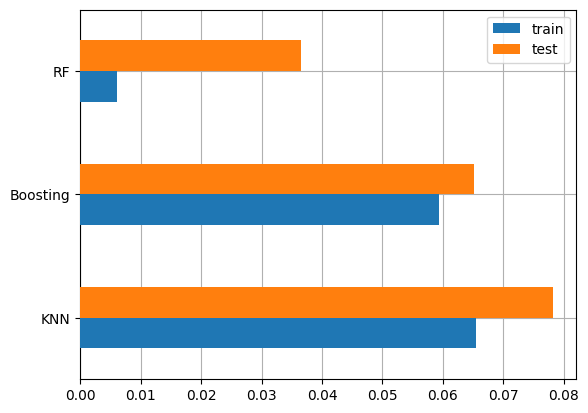

In [40]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari gambar di atas, terlihat bahwa, model Random Forest (RF) memberikan nilai eror yang paling kecil. Sedangkan model dengan algoritma KNN memiliki eror yang paling besar (berdasarkan grafik, angkanya di atas 0.07). Sehingga model RF yang akan kita pilih sebagai model terbaik untuk melakukan prediksi nlai ujian.

In [41]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
189,60.5,72.2,67.0,69.2


Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati.